Benefícios por Incapacidade Concedidos por Classificação Internacional de Doenças (CID)

Benefícios concedidos pela Classificação Internacional de Doenças (CID-10), grupos de espécie 
específicos, clientela, sexo do beneficiário e ano da Data de Despacho do Beneficio (DDB). Não inclui 
pensões alimentícias, desdobramentos de pensões por morte nem benefícios de prestação única. Considera 
apenas espécies de 'aposentadorias por invalidez' e 'auxílios-doença'.

# BANCO DE DADOS da disciplina de DATAMINING 
    
Com base nos dados da DADOSGOV(http://www.dados.gov.br) vamos analisar os casos de paciêntes vulneraveis ao COVID19 

- Seleção: Escolher um subconjunto de dados abas, colunas e linhas relevantes.
- Limpesa: Retirar abas, colunas e linhas irrelevantes.
- Enriquecer: Adicionar abas, colunas e linhas de outra origens de dados.
- Enriquecer Criar: Criar um valor novo que não existe(null) colunas e linhas.
- Transformação: Altera dados com objetivo de padronizar.

Link -> http://www.dados.gov.br/dataset/beneficios-por-incapacidade-concedidos-por-classificacao-internacional-de-doencas-cid10

Arquivo -> BD_ORIGINAL_CID_BENEFICIOS.csv

In [1]:
# Importando bibliotecas
# Por convenção pandas é chamado pd
import pandas as pd
import numpy as np
# Importar uma nova biblioteca para gráfico
import seaborn as sns
import matplotlib.pyplot as plt
# Configurando a matplotlib
%matplotlib inline

# Método - ENRIQUECIMENTO E TRANSFORMAÇÃO

In [2]:
# Carregar arquivo .csv
# Pandas vai converter o arquivo em um Dataframe(Quadradoo de dados) "Semelhante a planilhas de exell".
# Por convenção chamamos DataFrame de df

df = pd.read_csv("BD_BASE1.csv",encoding="cp1252")

# Remove coluna 'Unnamed: 0'
df = df.drop(columns=['Unnamed: 0'])


df.head(5)

,Ano,CID10,Sexo,Qde Benefícios Concedidos,Grupo CID,Grupo/Principais Espécies
0,2008,A02:Outr Infecc p/Salmonella,Masculino,1,Algumas doenças infecciosas e parasitárias,Ap Invalidez
1,2008,A04:Outr Infecc Intestinais Bacter,Masculino,1,Algumas doenças infecciosas e parasitárias,Ap Invalidez
2,2008,A15:Tuberc Respirat c/Conf Bacteriol e Histol,Masculino,112,Algumas doenças infecciosas e parasitárias,Ap Invalidez
3,2008,A16:Tuberc Vias Respirat s/Conf Bacter Histol,Masculino,38,Algumas doenças infecciosas e parasitárias,Ap Invalidez
4,2008,A17:Tuberc do Sist Nervoso,Masculino,3,Algumas doenças infecciosas e parasitárias,Ap Invalidez


In [3]:
# Verifica o tamanho do Dataframe, Quantidades de linha e coluna.
# Formato(linhas, colunas)
df.shape

(104695, 6)

# Decisão sobre dados ENRIQUECIMENTO E TRANSFORMAÇÃO

In [4]:
# Transformar Dtype 'Valor Benef Concedidos (R$)' object para float

## Esta exceção é lançada quando a string que você está tentando converter não está em um formato válido. 
#Isso acontece quando você utiliza a vírgula como separador decimal, quando a string é vazia ou possui 
#caracteres não numéricos, etc.

#df['Valor Benef Concedidos (R$)'] = df['Valor Benef Concedidos (R$)'].str.replace(',','.').astype(float)
#df.head(10)

######################################## Transformar coluna 'CID10' em duas colunas ########################################

In [5]:
# Separa por caractere e cria coluna exemplo: "1-Auxílio-Doença Lop"
CID10 = df['CID10'].str.split(':', expand=True).astype(str)
CID10.head(3)

,0,1
0,A02,Outr Infecc p/Salmonella
1,A04,Outr Infecc Intestinais Bacter
2,A15,Tuberc Respirat c/Conf Bacteriol e Histol


In [6]:
CID = CID10.rename(columns={0: 'CID-Índice', 1: 'CID-Descrição'})
CID_Indice = CID['CID-Índice']
CID_Descricao = CID['CID-Descrição']
CID.head(3)

,CID-Índice,CID-Descrição
0,A02,Outr Infecc p/Salmonella
1,A04,Outr Infecc Intestinais Bacter
2,A15,Tuberc Respirat c/Conf Bacteriol e Histol


In [7]:
# Adicionar colunas ao DataFrame
# Usando 'Endereço' como o nome da coluna
# e igualando-o à lista
#df['Endereço'] = cep

df['CID-Índice'] = CID_Indice
df['CID-Descrição'] = CID_Descricao

# Remove coluna 'CID10' que foi ajustada separando por tabelas 
df = df.drop(columns=['CID10'])


df.head()

,Ano,Sexo,Qde Benefícios Concedidos,Grupo CID,Grupo/Principais Espécies,CID-Índice,CID-Descrição
0,2008,Masculino,1,Algumas doenças infecciosas e parasitárias,Ap Invalidez,A02,Outr Infecc p/Salmonella
1,2008,Masculino,1,Algumas doenças infecciosas e parasitárias,Ap Invalidez,A04,Outr Infecc Intestinais Bacter
2,2008,Masculino,112,Algumas doenças infecciosas e parasitárias,Ap Invalidez,A15,Tuberc Respirat c/Conf Bacteriol e Histol
3,2008,Masculino,38,Algumas doenças infecciosas e parasitárias,Ap Invalidez,A16,Tuberc Vias Respirat s/Conf Bacter Histol
4,2008,Masculino,3,Algumas doenças infecciosas e parasitárias,Ap Invalidez,A17,Tuberc do Sist Nervoso


In [8]:
# Função que identifica caractere e retorna outro

def define_classe(sex):
    if sex == 'Masculino':
        return 'M'
    elif sex == 'Feminino':
        return 'F'
    
df['Sexo'] = df['Sexo'].map(define_classe)

In [9]:
# Criar um Subconjunto dos dados originais
# Seleciona a coluna e classifica somente linhas
df_SexoM = df[df['Sexo'] == 'M'] 
df_SexoM.head()

,Ano,Sexo,Qde Benefícios Concedidos,Grupo CID,Grupo/Principais Espécies,CID-Índice,CID-Descrição
0,2008,M,1,Algumas doenças infecciosas e parasitárias,Ap Invalidez,A02,Outr Infecc p/Salmonella
1,2008,M,1,Algumas doenças infecciosas e parasitárias,Ap Invalidez,A04,Outr Infecc Intestinais Bacter
2,2008,M,112,Algumas doenças infecciosas e parasitárias,Ap Invalidez,A15,Tuberc Respirat c/Conf Bacteriol e Histol
3,2008,M,38,Algumas doenças infecciosas e parasitárias,Ap Invalidez,A16,Tuberc Vias Respirat s/Conf Bacter Histol
4,2008,M,3,Algumas doenças infecciosas e parasitárias,Ap Invalidez,A17,Tuberc do Sist Nervoso


In [10]:
# Criar um Subconjunto dos dados originais
# Seleciona a coluna e classifica somente linhas
df_SexoF = df[df['Sexo'] == 'F'] 
df_SexoF.head()

,Ano,Sexo,Qde Benefícios Concedidos,Grupo CID,Grupo/Principais Espécies,CID-Índice,CID-Descrição
4534,2008,F,1,Algumas doenças infecciosas e parasitárias,Ap Invalidez,A00,Colera
4535,2008,F,1,Algumas doenças infecciosas e parasitárias,Ap Invalidez,A01,Febres Tifoide e Paratifoide
4536,2008,F,23,Algumas doenças infecciosas e parasitárias,Ap Invalidez,A15,Tuberc Respirat c/Conf Bacteriol e Histol
4537,2008,F,10,Algumas doenças infecciosas e parasitárias,Ap Invalidez,A16,Tuberc Vias Respirat s/Conf Bacter Histol
4538,2008,F,1,Algumas doenças infecciosas e parasitárias,Ap Invalidez,A17,Tuberc do Sist Nervoso


In [11]:
# Verificar os tipos da coluna
df.dtypes

Ano                           int64
Sexo                         object
Qde Benefícios Concedidos     int64
Grupo CID                    object
Grupo/Principais Espécies    object
CID-Índice                   object
CID-Descrição                object
dtype: object

####### Selecionar coluna 'Grupo CID' com casos de paciêntes que são vulneraveis ao COVID19, dados de 2008 à 2017 ##########

In [12]:
df['Grupo CID'].value_counts()

Lesões, envenenamento e algumas outras conseqü    17960
Neoplasias [tumores]                              10314
Doenças do sistema osteomuscular e do tecido c     8698
Doenças do aparelho circulatório                   7188
Algumas doenças infecciosas e parasitárias         6947
Doenças do sistema nervoso                         5847
Transtornos mentais e comportamentais              5173
Causas externas de morbidade e de mortalidade      5150
Doenças do aparelho digestivo                      4738
Doenças da pele e do tecido subcutâneo             4530
Doenças do aparelho respiratório                   4374
Doenças do olho e anexos                           3995
Doenças do aparelho geniturinário                  3860
Malformações congênitas, deformidades e anomal     3181
Doenças endócrinas, nutricionais e metabólicas     2733
Sintomas, sinais e achados anormais de exames      2644
Fatores que influenciam o estado de saúde e o      2159
Doenças do sangue e dos órgãos hematopoéticos   

# Doenças do aparelho respiratório
Quantidade de casos: 4374

In [13]:
df_aprespiratorio = df[df['Grupo CID'].str.contains('Doenças do aparelho respiratório')]
# CID10 JXX - Doenças do aparelho respiratório
df_aprespiratorio.head(3)

,Ano,Sexo,Qde Benefícios Concedidos,Grupo CID,Grupo/Principais Espécies,CID-Índice,CID-Descrição
421,2008,M,1,Doenças do aparelho respiratório,Ap Invalidez,J04,Laringite e Traqueite Agudas
422,2008,M,13,Doenças do aparelho respiratório,Ap Invalidez,J15,Pneumonia Bacter Ncop
423,2008,M,2,Doenças do aparelho respiratório,Ap Invalidez,J16,Pneumonia Dev Out Microorg Infecc Espec N


In [14]:
# Quantidade de dados Doenças do aparelho respiratório
df_aprespiratorio.shape

(4374, 7)

In [15]:
# Maior casos
df_aprespiratorio['CID-Descrição'].value_counts()

Asma                                         159
Outr Doenc Pulmonares Obstrutivas Cronica    157
Outr Doenc Pulmonares Intersticiais          123
Enfisema                                     119
Pneumonite Hipersensibilid Dev Poeiras Or    117
                                            ... 
Nasofaringite Aguda                           25
Pneumonia Dev Haemophilus Infuenzae           25
Laringite Obstrutiva Aguda e Epiglotite       23
Pneumoconiose dos Mineiros de Carvao          23
Influenza [Gripe] Devida a Vírus Identifi     12
Name: CID-Descrição, Length: 64, dtype: int64

In [16]:
import re

# Expressão regular é uma sequência de caracteres 
#usados principalmente para encontrar e substituir padrões numa string ou num arquivo.

df_apJXX = df_aprespiratorio.loc[df['CID-Índice'].str.contains('J', flags=re.I, regex=True)]
df_apJXX.head(5)

,Ano,Sexo,Qde Benefícios Concedidos,Grupo CID,Grupo/Principais Espécies,CID-Índice,CID-Descrição
421,2008,M,1,Doenças do aparelho respiratório,Ap Invalidez,J04,Laringite e Traqueite Agudas
422,2008,M,13,Doenças do aparelho respiratório,Ap Invalidez,J15,Pneumonia Bacter Ncop
423,2008,M,2,Doenças do aparelho respiratório,Ap Invalidez,J16,Pneumonia Dev Out Microorg Infecc Espec N
424,2008,M,13,Doenças do aparelho respiratório,Ap Invalidez,J18,Pneumonia p/Microorg Ne
425,2008,M,9,Doenças do aparelho respiratório,Ap Invalidez,J20,Bronquite Aguda


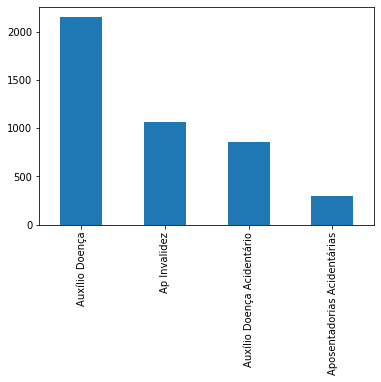

In [17]:
df_apJXX["Grupo/Principais Espécies"].value_counts().plot.bar()

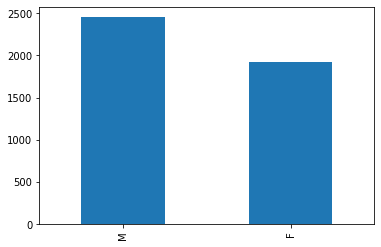

In [18]:
df_apJXX["Sexo"].value_counts().plot.bar()

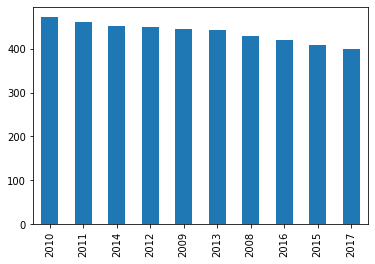

In [22]:
df_apJXX["Ano"].value_counts().plot.bar()

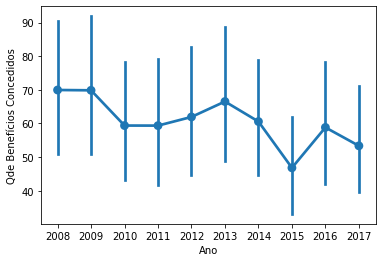

In [19]:
# Exibir o gráfico de linhas com marcação em cada ponto
sns.pointplot(x='Ano', y='Qde Benefícios Concedidos', data=df_apJXX)

# Ajustar legenda
plt.xticks(rotation=0)
plt.show()

In [20]:
df_apJXX.head(20)

,Ano,Sexo,Qde Benefícios Concedidos,Grupo CID,Grupo/Principais Espécies,CID-Índice,CID-Descrição
421,2008,M,1,Doenças do aparelho respiratório,Ap Invalidez,J04,Laringite e Traqueite Agudas
422,2008,M,13,Doenças do aparelho respiratório,Ap Invalidez,J15,Pneumonia Bacter Ncop
423,2008,M,2,Doenças do aparelho respiratório,Ap Invalidez,J16,Pneumonia Dev Out Microorg Infecc Espec N
424,2008,M,13,Doenças do aparelho respiratório,Ap Invalidez,J18,Pneumonia p/Microorg Ne
425,2008,M,9,Doenças do aparelho respiratório,Ap Invalidez,J20,Bronquite Aguda
426,2008,M,1,Doenças do aparelho respiratório,Ap Invalidez,J21,Bronquiolite Aguda
427,2008,M,2,Doenças do aparelho respiratório,Ap Invalidez,J32,Sinusite Cronica
428,2008,M,2,Doenças do aparelho respiratório,Ap Invalidez,J37,Laringite e Laringotraqueite Cronicas
429,2008,M,15,Doenças do aparelho respiratório,Ap Invalidez,J38,Doenc das Cordas Vocais e da Laringe Ncop
430,2008,M,4,Doenças do aparelho respiratório,Ap Invalidez,J39,Outr Doenc das Vias Aereas Super


In [21]:
# Total de concessões no ano
df_apJ2017["Qde Benefícios Concedidos"].sum()


NameError: name 'df_apJ2017' is not defined

In [ ]:
#ano = int(input(''))

ano = 2008

while ano <= 2017:
    anox = df_apJXX[df_apJXX['Ano'] == ano]
    anoy = anox["Qde Benefícios Concedidos"].sum()
    print("Ano", ano)
    print(anoy)
    ano += 1
else:
    print 
    


In [ ]:
# As 3 maiores concessões no ano de 2017
df_apJ2017.nlargest(3,'Qde Benefícios Concedidos')

In [ ]:
# Total de concessões no ano de 2017
df_apJ2017["Qde Benefícios Concedidos"].sum()

In [ ]:
# Função que identifica caractere e retorna outro

#def define_classe(sex):
#    if sex == 'M':
#        return 'PRIMEIRO'
#    elif sex == 'F':
#        return 'SEGUNDO'

#df_apJ2017['CLASSE'] =df_apJ2017['Sexo'].map(define_classe)

In [ ]:
# Função que identifica caractere e retorna outro



def define_classe(sex):
    item = 0
    for item in ["J0"+str(i) for i in range(7)]:
        if sex == item:
            return 'Infecções agudas das vias aéreas superiores'
    i = 10
    for item in ["J"+str(i) for i in range(19)]:
        if sex == item:
            return 'Influenza [gripe] e pneumonia'
    
    i = 20
    for item in ["J"+str(i) for i in range(23)]:
        if sex == item:
            return 'Outras infecções agudas das vias aéreas inferiores'
        
    i = 30
    for item in ["J"+str(i) for i in range(40)]:
        if sex == item:
            return 'Outras doenças das vias aéreas superiores'
    
    i = 40
    for item in ["J"+str(i) for i in range(49)]:
        if sex == item:
            return 'Doenças crônicas das vias aéreas inferiores'

df_apJ2017['CID-Classe'] = df_apJ2017['CID-Índice'].map(define_classe)

In [ ]:
df_apJ2017.head(20)

In [ ]:


for item in ["J0"+str(i) for i in range(6)]:
    print (item)

In [ ]:
#Para Salvar arquivo em CSV
df.to_csv('BD_BASE2.csv',encoding="cp1252")

In [ ]:
#Para Salvar arquivo em CSV
df_aprespiratorio.to_csv('BD_CID_APARELHO_RESPIRATORIO.csv',encoding="cp1252")